In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold,cross_val_score
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
from numpy import mean,std
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel("C:\\Datasets\\cybersec\\XSS Attack Dataset with 461 entries.xlsx")

In [3]:
df.head()

,App Names,Permissions,API Name,Website Name,IP,Location,Label
0,XSSDetector,"INTERNET,READ_CONTACTS,ACCESS_FINE_LOCATION,AC...",getDeviceId,http://www.5riversmarketing.com/,104.243.40.3,USA - Florida,Yes
1,Attackers 2,"INTERNET,READ_CONTACTS,ACCESS_FINE_LOCATION,AC...",getSimSerialNumber,http://www.5riversmarketing.com/,104.243.40.3,USA - Florida,Yes
2,Attackers 3,"INTERNET,ACCESS_FINE_LOCATION,ACCESS_COARSE_LO...",Not Sensitive,http://www.5riversmarketing.com/,104.243.40.3,USA - Florida,No
3,Attackers 4,"INTERNET,READ_PHONE_STATE,SEND_SMS",Not Sensitive,http://demo2.5riversmarketing.com/,104.243.40.3,USA - Florida,No
4,Attackers 5,"INTERNET,READ_CONTACTS,READ_PHONE_STATE",Not Sensitive,http://www.5riversmarketing.com/,104.243.40.3,USA - Florida,No


In [4]:
df.isnull().sum()

App Names       0
Permissions     0
API Name        0
Website Name    0
IP              0
Location        0
Label           0
dtype: int64

In [5]:
df.shape

(460, 7)

In [6]:
def how_many_unique(column,df =df):
    # This function returns all the unique values in a column
    # Also it lists the most frequent columns
    print(f"The total number of unique_values in {column}is {df[column].nunique()}")
    print("************************************************************************")
    print(f"The most frequently appearing elements are {df[column].value_counts().head(10)}")

In [7]:
for column in df.columns:
    how_many_unique(column)

The total number of unique_values in App Namesis 460
************************************************************************
The most frequently appearing elements are XSSDetector             1
Pussy Puzzle            1
Og Mandino Scrolls      1
Kinder Puzzlespiele     1
Navaratri Navarang      1
Akbar-Birbal Tales      1
TouhouCirnoAlarm        1
fünfzehn Gebete         1
SudokuGame              1
Marble Blast Crusher    1
Name: App Names, dtype: int64
The total number of unique_values in Permissionsis 27
************************************************************************
The most frequently appearing elements are BLUETOOTH,BLUETOOTH_ADMIN,BROADCAST_STICKY,CHANGE_NETWORK_STATE,CHANGE_WIFI_MULTICAST_STATE,CHANGE_WIFI_STATE                                                                     45
ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_NETWORK_STATE,ACCESS_NOTIFICATION_POLICY,ACCESS_WIFI_STATE                                                                                  45
ACCESS_LO

In [8]:
# To know the datatypes for all our columns
df.dtypes

App Names       object
Permissions     object
API Name        object
Website Name    object
IP              object
Location        object
Label           object
dtype: object

In [9]:
how_many_unique('App Names')

The total number of unique_values in App Namesis 460
************************************************************************
The most frequently appearing elements are XSSDetector             1
Pussy Puzzle            1
Og Mandino Scrolls      1
Kinder Puzzlespiele     1
Navaratri Navarang      1
Akbar-Birbal Tales      1
TouhouCirnoAlarm        1
fünfzehn Gebete         1
SudokuGame              1
Marble Blast Crusher    1
Name: App Names, dtype: int64


In [10]:
how_many_unique('Location')

The total number of unique_values in Locationis 163
************************************************************************
The most frequently appearing elements are United States    29
Azerbaijan       14
USA - Florida    14
Brazil            6
Japan             5
France            4
Uganda            4
Ukraine           4
Bhutan            4
Bermuda           4
Name: Location, dtype: int64


In [11]:
how_many_unique('Label')

The total number of unique_values in Labelis 2
************************************************************************
The most frequently appearing elements are Yes    230
No     230
Name: Label, dtype: int64


# DATA EXPLORATION

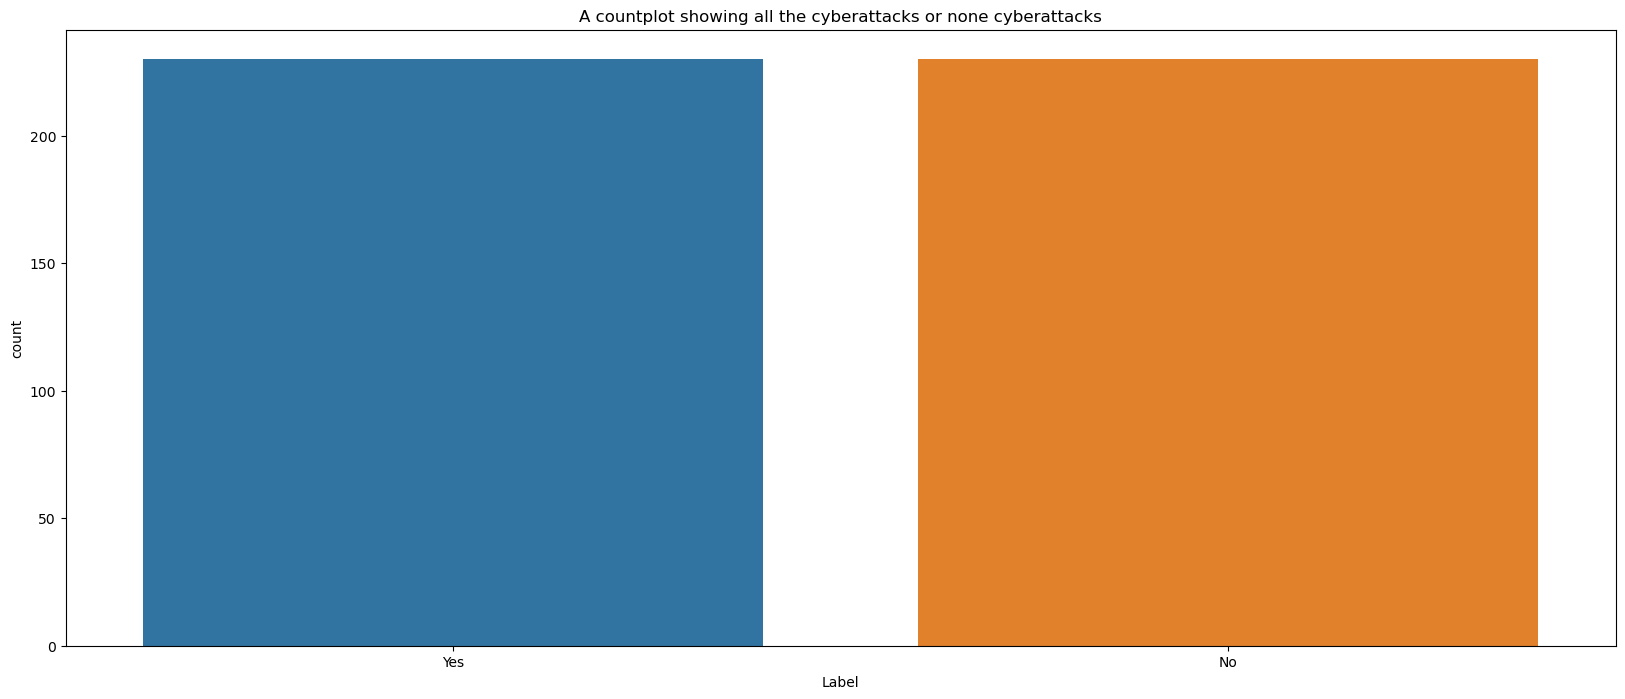

In [12]:
#How many hacks or no hacks
fig = plt.figure(figsize=(20,8))
sns.countplot(data=df,x='Label')
plt.title('A countplot showing all the cyberattacks or none cyberattacks')
plt.show()

In [13]:
#df.hist(figsize=(15,8),color='black')
#plt.title('General Histogram Plot')
#plt.show()

In [14]:
df.columns

Index(['App Names', 'Permissions', 'API Name', 'Website Name', 'IP',
       'Location', 'Label'],
      dtype='object')

In [15]:
how_many_unique('API Name')

The total number of unique_values in API Nameis 39
************************************************************************
The most frequently appearing elements are Not Sensitive               230
getSubscriberId               9
getCellLocation               9
getPhoneType                  9
getLastKnownLocation          9
sendMultipartTextMessage      9
peekAuthToken                 8
sendTextMessage               8
getAllBookmarks               8
getUngzippedContent           7
Name: API Name, dtype: int64


In [16]:
df.columns

Index(['App Names', 'Permissions', 'API Name', 'Website Name', 'IP',
       'Location', 'Label'],
      dtype='object')

In [17]:

lbl_encoder ={}
"""for column in df.columns:
    lbl_encoder = LabelEncoder()
    df[column] = lbl_encoder.fit_transform(df[column].values)"""

for column in df.columns:
    if df[column].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[column].values))
        df[column] = lbl.transform(df[column].values)

    

In [18]:
df.columns

Index(['App Names', 'Permissions', 'API Name', 'Website Name', 'IP',
       'Location', 'Label'],
      dtype='object')

In [19]:
df.head()

,App Names,Permissions,API Name,Website Name,IP,Location,Label
0,435,12,16,3,21,148,1
1,48,12,27,3,21,148,1
2,49,9,2,3,21,148,0
3,50,16,2,0,21,148,0
4,51,13,2,3,21,148,0


In [20]:
df.corr().abs()

,App Names,Permissions,API Name,Website Name,IP,Location,Label
App Names,1.000000,0.023961,0.097236,0.017836,0.048948,0.046738,0.075896
Permissions,0.023961,1.000000,0.045226,0.012127,0.035366,0.024879,0.034151
API Name,0.097236,0.045226,1.000000,0.016415,0.060349,0.024126,0.777282
Website Name,0.017836,0.012127,0.016415,1.000000,0.216228,0.129913,0.029288
IP,0.048948,0.035366,0.060349,0.216228,1.000000,0.180090,0.015536
Location,0.046738,0.024879,0.024126,0.129913,0.180090,1.000000,0.020264
Label,0.075896,0.034151,0.777282,0.029288,0.015536,0.020264,1.000000


In [21]:
df.dtypes

App Names       int32
Permissions     int32
API Name        int32
Website Name    int32
IP              int32
Location        int32
Label           int32
dtype: object

# MACHINE LEARNING 

In [30]:
# I will first make a pipeline using SKLEARN ,then create a model dictionary which we will later access for evaluation
# Using Stratifed Kfold validation I will then evaluate our models

def get_models():
    models = dict()
    models['lr'] = make_pipeline(StandardScaler(),LogisticRegression())
    models['knn'] = make_pipeline(StandardScaler(),KNeighborsClassifier())
    #models['rfr'] = RandomForestClassifier()
    models['dtr'] = DecisionTreeClassifier()
    models['svm'] =make_pipeline(StandardScaler(),SVC())
    #models['ada'] = make_pipeline(StandardScaler(),AdaBoostClassifier())
    models['nB'] = make_pipeline(StandardScaler(),GaussianNB())
    return models
X = df.drop(['Label'],axis=1)
y = df['Label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True)

In [31]:
def evaluate(model,X,y):
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats = 3)
    scores = cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=-1,error_score='raise')

In [32]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate(model, X, y)
	results.append(scores)
	names.append(name)
try:
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
except :
        TypeError

In [33]:
#pyplot.boxplot(results,labels=names,showmeans=True)

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
predictions = nb.predict(X_test)
print(f"Classification Report :{classification_report(y_test,predictions)}")

Classification Report :              precision    recall  f1-score   support

           0       0.72      0.68      0.70        68
           1       0.70      0.74      0.72        70

    accuracy                           0.71       138
   macro avg       0.71      0.71      0.71       138
weighted avg       0.71      0.71      0.71       138



In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_predictions = log_reg.predict(X_test)
print(f"Classification Report :{classification_report(y_test,log_predictions)}")

Classification Report :              precision    recall  f1-score   support

           0       0.96      1.00      0.98        68
           1       1.00      0.96      0.98        70

    accuracy                           0.98       138
   macro avg       0.98      0.98      0.98       138
weighted avg       0.98      0.98      0.98       138



In [39]:
svc = LinearSVC()
svc.fit(X_train,y_train)
sv_predictions = svc.predict(X_test)
print(f"Classification report {classification_report(y_test,sv_predictions)}")

Classification report               precision    recall  f1-score   support

           0       0.89      1.00      0.94        68
           1       1.00      0.89      0.94        70

    accuracy                           0.94       138
   macro avg       0.95      0.94      0.94       138
weighted avg       0.95      0.94      0.94       138



C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [56]:
my_models = {}
my_models['mnb'] = MultinomialNB()
my_models['log']= LogisticRegression()
my_models['lsv'] = LinearSVC()


In [57]:
my_models.keys()

dict_keys(['mnb', 'log', 'lsv'])